# Holdout set
-------------

This example shows when and how to use ATOM's holdout set in an exploration pipeline.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


## Run the pipeline

In [3]:
# Initialize atom specifying a fraction of the dataset for holdout
atom = ATOMClassifier(X, n_rows=0.5, holdout_size=0.2, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (56877, 22)
Memory: 24.67 MB
Scaled: False
Missing values: 127079 (10.2%)
Categorical features: 5 (23.8%)
Duplicate samples: 18 (0.0%)
-------------------------------------
Train set size: 42658
Test set size: 14219
Holdout set size: 14219
-------------------------------------
|   |       dataset |         train |          test |
| - | ------------- | ------------- | ------------- |
| 0 |   44113 (3.5) |   33085 (3.5) |   11028 (3.5) |
| 1 |   12764 (1.0) |    9573 (1.0) |    3191 (1.0) |



In [4]:
# The test and holdout fractions are split after subsampling the dataset
# Also note that the holdout data set is not a part of atom's dataset
print("Length loaded data:", len(X))
print("Length dataset + holdout:", len(atom.dataset) + len(atom.holdout))

Length loaded data: 142193
Length dataset + holdout: 71096


In [5]:
atom.impute()
atom.encode()

Fitting Imputer...
Imputing missing values...
 --> Dropping 245 samples due to missing values in feature MinTemp.
 --> Dropping 140 samples due to missing values in feature MaxTemp.
 --> Dropping 606 samples due to missing values in feature Rainfall.
 --> Dropping 24376 samples due to missing values in feature Evaporation.
 --> Dropping 27135 samples due to missing values in feature Sunshine.
 --> Dropping 3774 samples due to missing values in feature WindGustDir.
 --> Dropping 3747 samples due to missing values in feature WindGustSpeed.
 --> Dropping 4105 samples due to missing values in feature WindDir9am.
 --> Dropping 1560 samples due to missing values in feature WindDir3pm.
 --> Dropping 533 samples due to missing values in feature WindSpeed9am.
 --> Dropping 1059 samples due to missing values in feature WindSpeed3pm.
 --> Dropping 700 samples due to missing values in feature Humidity9am.
 --> Dropping 1457 samples due to missing values in feature Humidity3pm.
 --> Dropping 5598 s

In [6]:
# Unlike train and test, the holdout data set is not transformed until used for predictions
atom.holdout

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,PearceRAAF,14.0,25.4,0.0,NaN,6.7,N,50.0,NE,W,...,30.0,24.0,1010.5,1008.4,2.0,7.0,19.0,23.8,No,0
1,Witchcliffe,6.5,15.8,4.4,NaN,NaN,W,26.0,NaN,W,...,99.0,58.0,1022.6,1021.3,NaN,NaN,10.1,14.2,Yes,1
2,Adelaide,6.8,18.4,NaN,NaN,NaN,WNW,31.0,SE,WSW,...,49.0,43.0,1023.8,1020.2,NaN,NaN,13.8,18.0,NaN,0
3,Penrith,16.1,28.2,0.0,NaN,NaN,ESE,22.0,NaN,SE,...,73.0,48.0,NaN,NaN,NaN,NaN,21.8,27.7,No,0
4,Cairns,21.7,32.6,0.0,8.0,7.2,SE,33.0,SSE,ESE,...,70.0,50.0,1008.3,1005.5,6.0,7.0,27.2,31.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,Uluru,13.8,32.6,0.0,NaN,NaN,ENE,43.0,ENE,SSE,...,18.0,8.0,1018.5,1013.2,NaN,NaN,23.5,31.0,No,0
14215,Nuriootpa,15.0,31.6,3.6,6.9,11.2,SW,44.0,ENE,W,...,73.0,23.0,1004.3,1001.9,3.0,NaN,19.8,30.8,Yes,0
14216,WaggaWagga,7.3,12.2,4.6,1.4,0.1,W,48.0,WNW,WNW,...,91.0,85.0,1012.9,1013.3,8.0,7.0,9.8,11.8,Yes,0
14217,Richmond,17.7,32.0,21.4,11.6,NaN,W,39.0,N,W,...,67.0,34.0,1011.0,1008.2,NaN,NaN,23.4,31.4,Yes,0


In [7]:
atom.run(models=["GNB", "LR", "RF"])


Training ========================= >>
Models: GNB, LR, RF
Metric: f1


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> f1: 0.6017
Test evaluation --> f1: 0.5981
Time elapsed: 0.034s
-------------------------------------------------
Total time: 0.035s


Results for Logistic Regression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.6182
Test evaluation --> f1: 0.6217
Time elapsed: 0.130s
-------------------------------------------------
Total time: 0.130s


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.6289
Time elapsed: 2.742s
-------------------------------------------------
Total time: 2.742s


Final results ==================== >>
Duration: 2.908s
-------------------------------------
Gaussian Naive Bayes --> f1: 0.5981
Logistic Regression  --> f1: 0.6217
Random Forest        --> f1: 0.6289 ~ !


In [8]:
atom.plot_prc()

In [9]:
# Based on the results on the test set, we select the best model for further tuning
atom.run("lr_tuned", n_calls=10, n_initial_points=5)


Training ========================= >>
Models: LR_tuned
Metric: f1


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio |      f1 | best_f1 |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------- | ------- | ---------- |
| Initial point 1  |      l2 | 77.7558 | libli.. |      188 |      --- |  0.6235 |  0.6235 |  0.273s |     0.286s |
| Initial point 2  |      l2 | 21.4645 |    saga |      376 |      --- |  0.6358 |  0.6358 |  0.504s |     0.996s |
| Initial point 3  |      l2 |  7.4023 |   lbfgs |      467 |      --- |  0.6133 |  0.6358 |  0.288s |     1.355s |
| Initial point 4  |      l2 |  0.8242 |   lbfgs |      207 |      --- |   0.613 |  0.6358 |  0.285s |     1.709s |
| Initial point 5  |    none |     --- |   lbfgs |      303 |      --- |  0.6468 |  0.6468 |  0.276s |     2.054s |
| Iteration 6      |    none |     --- | newto.. |      224 |      --- |  0.5964 

## Analyze the results

We already used the test set to choose the best model for futher tuning, so this set is no longer truly independent. Although it may not be directly visible in the results, using the test set now to evaluate the tuned LR model would be a mistake, since it carries a bias. For this reason, we have set apart an extra, indepedent set to validate the final model: the holdout set. If we are not going to use the test set for validation, we might as well use it to train the model and so optimize the use of the available data. Use the full_train method for this.

In [10]:
# Re-train the model on the full dataset (train + test) 
atom.lr_tuned.full_train()

Model LR_tuned successfully retrained.


In [11]:
# Evaluate on the holdout set
atom.lr_tuned.evaluate(dataset="holdout")

accuracy             0.850515
average_precision    0.724313
balanced_accuracy    0.738124
f1                   0.616157
jaccard              0.445251
matthews_corrcoef    0.535804
precision            0.728155
recall               0.534019
roc_auc              0.887911
Name: LR_tuned, dtype: float64

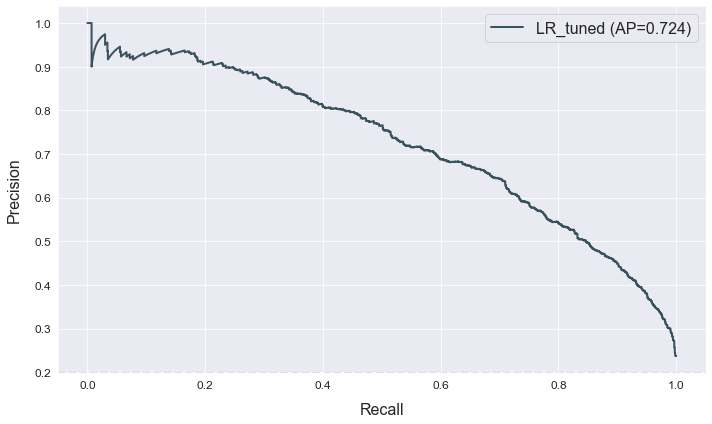

In [12]:
atom.lr_tuned.plot_prc(dataset="holdout")